In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

import seaborn as sns

In [2]:
df = pd.read_csv('Kaggle Glassdoor Gender Pay Gap.csv')
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [3]:
df.Dept.value_counts()

Operations        210
Sales             207
Management        198
Administration    193
Engineering       192
Name: Dept, dtype: int64

In [4]:
del df['Bonus']
del df['PerfEval']
del df['Dept']


In [5]:
df["Gender"] = [0 if x == "Male" else 1 for x in df.Gender]
df

,JobTitle,Gender,Age,Education,Seniority,BasePay
0,Graphic Designer,1,18,College,2,42363
1,Software Engineer,0,21,College,5,108476
2,Warehouse Associate,1,19,PhD,5,90208
3,Software Engineer,0,20,Masters,4,108080
4,Graphic Designer,0,26,Masters,5,99464
...,...,...,...,...,...,...
995,Marketing Associate,1,61,High School,1,62644
996,Data Scientist,0,57,Masters,2,108977
997,Financial Analyst,0,48,High School,1,92347
998,Financial Analyst,0,65,High School,1,97376


In [6]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(df)
print(X_dummies.columns)
X_dummies

Index(['Gender', 'Age', 'Seniority', 'BasePay', 'JobTitle_Data Scientist',
       'JobTitle_Driver', 'JobTitle_Financial Analyst',
       'JobTitle_Graphic Designer', 'JobTitle_IT', 'JobTitle_Manager',
       'JobTitle_Marketing Associate', 'JobTitle_Sales Associate',
       'JobTitle_Software Engineer', 'JobTitle_Warehouse Associate',
       'Education_College', 'Education_High School', 'Education_Masters',
       'Education_PhD'],
      dtype='object')


,Gender,Age,Seniority,BasePay,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Education_College,Education_High School,Education_Masters,Education_PhD
0,1,18,2,42363,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,21,5,108476,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,19,5,90208,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,20,4,108080,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,26,5,99464,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,61,1,62644,0,0,0,0,0,0,1,0,0,0,0,1,0,0
996,0,57,2,108977,1,0,0,0,0,0,0,0,0,0,0,0,1,0
997,0,48,1,92347,0,0,1,0,0,0,0,0,0,0,0,1,0,0
998,0,65,1,97376,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [7]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Gender                        1000 non-null   int64
 1   Age                           1000 non-null   int64
 2   Seniority                     1000 non-null   int64
 3   BasePay                       1000 non-null   int64
 4   JobTitle_Data Scientist       1000 non-null   uint8
 5   JobTitle_Driver               1000 non-null   uint8
 6   JobTitle_Financial Analyst    1000 non-null   uint8
 7   JobTitle_Graphic Designer     1000 non-null   uint8
 8   JobTitle_IT                   1000 non-null   uint8
 9   JobTitle_Manager              1000 non-null   uint8
 10  JobTitle_Marketing Associate  1000 non-null   uint8
 11  JobTitle_Sales Associate      1000 non-null   uint8
 12  JobTitle_Software Engineer    1000 non-null   uint8
 13  JobTitle_Warehouse Associate  1000

In [8]:
# (X_dummies.BasePay+X_dummies.Bonus) == X_dummies.TotalComp

In [9]:
X = X_dummies.drop(["BasePay"], axis=1)
y = X_dummies["BasePay"]

In [10]:
y

0       42363
1      108476
2       90208
3      108080
4       99464
        ...  
995     62644
996    108977
997     92347
998     97376
999    123108
Name: BasePay, Length: 1000, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [12]:
len(X_train)

750

In [13]:
X_dummies.BasePay.value_counts()

77584     2
77793     2
125770    2
100183    2
97376     2
         ..
116069    1
52578     1
81249     1
95584     1
67585     1
Name: BasePay, Length: 992, dtype: int64

In [14]:
X_train

,Gender,Age,Seniority,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Education_College,Education_High School,Education_Masters,Education_PhD
82,0,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
991,1,65,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
789,1,23,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0
894,1,57,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
398,0,47,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,28,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
270,1,58,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
860,0,37,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1
435,0,63,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [15]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.8570018435991357

In [16]:
predictions = reg.predict(X_test)
predictions

array([ 98595.35690972, 151020.5720479 , 115744.40921938, 117889.88638839,
       120101.18564726,  97724.25473578,  81644.45175034,  99211.71308091,
        72623.01045486,  98272.86318665, 102822.79951465,  83882.60211466,
       106141.14478476, 112302.86818236, 110487.41967388, 121329.0790018 ,
        68206.83688239, 102868.7590442 ,  72725.70091624,  87722.73096738,
        93901.80542691,  80493.21023926, 120401.27981021, 102719.49833636,
        93525.50855311,  76621.92767165, 114674.41081181,  93218.66126573,
       122994.71666468, 113353.45986497, 128814.58572024,  87049.37618957,
        80849.98128636, 115677.0008734 ,  71891.35302873,  77622.22913081,
        62401.35494284,  66266.9814213 , 101621.64178723,  66527.90120743,
       107882.65303339, 116924.09483172,  66745.89292376,  75405.12350854,
       109577.97033319,  92324.71133592,  96550.11544035, 108529.60948154,
        75378.0593995 , 105701.23447136, 104928.84768343,  73281.64424239,
        62357.48410208, 1

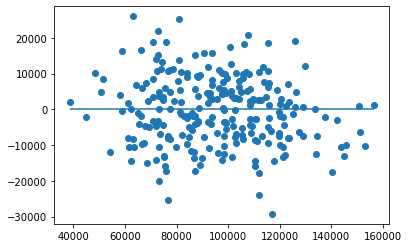

In [17]:
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

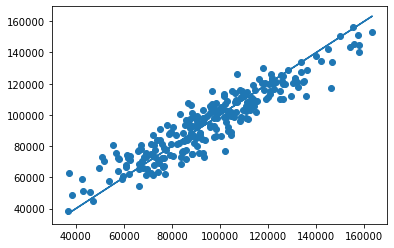

In [18]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test)
plt.show()

In [19]:
X_dummies.corr()

,Gender,Age,Seniority,BasePay,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Education_College,Education_High School,Education_Masters,Education_PhD
Gender,1.000000,0.028625,0.028131,-0.167766,0.018957,0.023775,-0.006976,0.014398,0.034505,-0.168910,0.321643,-0.006812,-0.276604,0.027171,0.047852,0.036237,-0.058816,-0.025337
Age,0.028625,1.000000,-0.021414,0.562681,-0.000238,0.017336,-0.014503,-0.016600,0.018121,0.025100,0.006644,0.022798,-0.012765,-0.044846,-0.010917,-0.011759,0.006157,0.016840
Seniority,0.028131,-0.021414,1.000000,0.511096,-0.004401,-0.005887,-0.006721,0.033390,-0.022437,-0.013508,0.018723,-0.000673,-0.011136,0.011553,0.023458,-0.060639,0.012200,0.026781
BasePay,-0.167766,0.562681,0.511096,1.000000,-0.027873,-0.063599,0.007165,-0.046597,-0.048064,0.383184,-0.257322,-0.013688,0.152506,-0.061054,-0.052201,-0.136104,0.072334,0.119347
JobTitle_Data Scientist,0.018957,-0.000238,-0.004401,-0.027873,1.000000,-0.109523,-0.119821,-0.114097,-0.112802,-0.108860,-0.126611,-0.111498,-0.121071,-0.108860,-0.043773,0.004728,0.011920,0.026846
JobTitle_Driver,0.023775,0.017336,-0.005887,-0.063599,-0.109523,1.000000,-0.109523,-0.104291,-0.103107,-0.099504,-0.115730,-0.101915,-0.110666,-0.099504,0.041209,-0.024541,-0.018292,0.002792
JobTitle_Financial Analyst,-0.006976,-0.014503,-0.006721,0.007165,-0.119821,-0.109523,1.000000,-0.114097,-0.112802,-0.108860,-0.126611,-0.111498,-0.121071,-0.108860,0.001611,-0.009932,0.004507,0.004057
JobTitle_Graphic Designer,0.014398,-0.016600,0.033390,-0.046597,-0.114097,-0.104291,-0.114097,1.000000,-0.107414,-0.103660,-0.120564,-0.106172,-0.115288,-0.103660,0.018733,-0.045498,0.053270,-0.026253
JobTitle_IT,0.034505,0.018121,-0.022437,-0.048064,-0.112802,-0.103107,-0.112802,-0.107414,1.000000,-0.102483,-0.119195,-0.104967,-0.113979,-0.102483,0.038605,-0.026459,-0.004480,-0.006759
JobTitle_Manager,-0.168910,0.025100,-0.013508,0.383184,-0.108860,-0.099504,-0.108860,-0.103660,-0.102483,1.000000,-0.115029,-0.101298,-0.109996,-0.098901,0.010703,-0.030483,-0.016334,0.037580


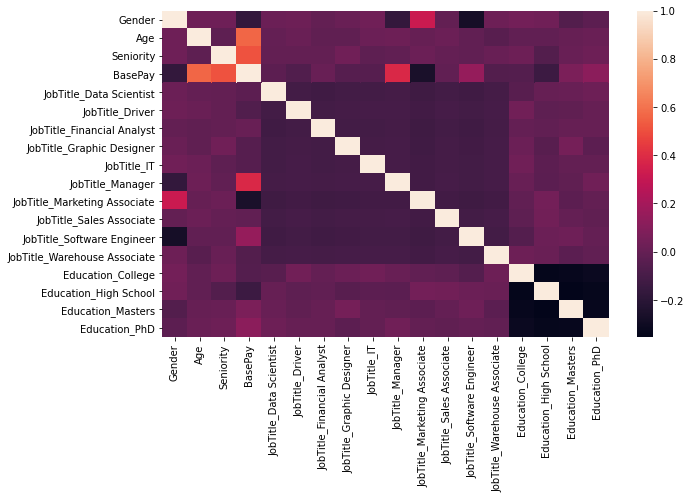

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(X_dummies.corr())
plt.show()

# Model Selection

In [21]:
reg_full = LinearRegression().fit(X, y)
predictions = reg_full.predict(X)

print(reg_full.score(X, y))
print(predictions)

0.8349329859478383
[ 54476.01927741 103094.08610937  91670.07427327  97209.70133513
  96925.72343165  82513.32312761  75741.65138005 105974.69747967
  97292.69374101 102992.99726552  96063.11646045  62968.05166813
  70821.1333709  101579.59766476  98125.87812695  65316.44500053
  99993.44152178  90799.88877415  88552.44729512  97729.12580178
 109535.45422352  82520.20827116  78217.692765    60801.46534167
 108990.33628643  62517.72276212  96204.48839954  87865.25252046
  97897.42523662 104338.50890686  77954.49510367 108518.18858786
  73938.83518067  69287.88716819 118703.57001266 105394.01078423
  92322.15407622  92746.68031636  89684.84111319  76388.62006022
 103396.92308851  87157.35566381  90159.65629511  65431.84487812
 111863.3691288   89592.52409058  75323.25332709  78041.57605491
  73420.88348666  77483.16990431  91429.56868286  95199.27546396
  92613.3547167   76610.38653843  88815.76404532  82070.24507252
  65263.88779763 118461.77894687  97572.96534648  66759.73866717
  8611

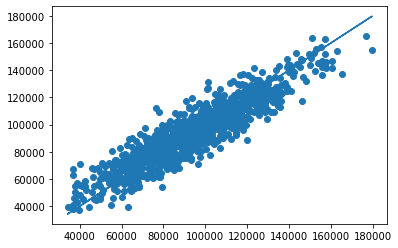

In [22]:
plt.scatter(y, predictions)
plt.plot(y, y)
plt.show()

In [23]:
import pickle

In [24]:
# save the model to disk
filename = 'finalized_model3.sav'
pickle.dump(reg, open(filename, 'wb'))

# Prepare the testing data

In [25]:
df_test = pd.read_csv('Kaggle Glassdoor Gender Pay Gap.csv')

In [26]:
del df_test['Bonus']
del df_test['PerfEval']
del df_test['Dept']

In [27]:
df_test["Gender"] = [0 if x == "Male" else 1 for x in df_test.Gender]
df_test

,JobTitle,Gender,Age,Education,Seniority,BasePay
0,Graphic Designer,1,18,College,2,42363
1,Software Engineer,0,21,College,5,108476
2,Warehouse Associate,1,19,PhD,5,90208
3,Software Engineer,0,20,Masters,4,108080
4,Graphic Designer,0,26,Masters,5,99464
...,...,...,...,...,...,...
995,Marketing Associate,1,61,High School,1,62644
996,Data Scientist,0,57,Masters,2,108977
997,Financial Analyst,0,48,High School,1,92347
998,Financial Analyst,0,65,High School,1,97376


In [28]:
X_test = pd.get_dummies(df_test)

In [29]:
filename = 'finalized_model3.sav' 
reg_load = pickle.load(open(filename, 'rb'))

In [30]:
predictions = reg_load.predict(X)

print(reg_load.score(X, y))
print(predictions)

0.8340453287165313
[ 54906.16457965 101103.72285445  92001.46339083  95982.70081011
  96364.69102949  82096.92563588  75616.05708035 104643.75754424
  97330.60503278 103248.56005761  95678.99313292  63045.41494394
  70739.91795391 101760.88586421  98785.77467444  65569.17325695
 100030.80324262  90477.81194033  88513.98504348  96943.52089182
 109259.52631935  82464.2909954   78467.71762219  61491.16321649
 107668.33240317  62971.69753681  94974.50919046  88075.59168759
  97896.38844935 103026.51987147  77289.19154869 108601.28965817
  73907.73626802  69445.78093958 118631.00473521 104370.72749033
  91018.27049008  91753.43205582  88638.80714254  74642.92986207
 102618.74421545  86949.80981297  89709.9847075   65773.89440948
 110370.41353904  88652.32941869  75740.89660232  78883.06171623
  71767.72864634  76810.00159279  91462.03212421  93966.31757082
  92328.21547553  77161.75606463  88533.52402413  81547.61654324
  66066.45363496 117477.21854572  97405.65240366  66527.90120743
  8576

In [31]:
X.head()

,Gender,Age,Seniority,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Education_College,Education_High School,Education_Masters,Education_PhD
0,1,18,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,21,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,19,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,20,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,26,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [32]:
X.columns

Index(['Gender', 'Age', 'Seniority', 'JobTitle_Data Scientist',
       'JobTitle_Driver', 'JobTitle_Financial Analyst',
       'JobTitle_Graphic Designer', 'JobTitle_IT', 'JobTitle_Manager',
       'JobTitle_Marketing Associate', 'JobTitle_Sales Associate',
       'JobTitle_Software Engineer', 'JobTitle_Warehouse Associate',
       'Education_College', 'Education_High School', 'Education_Masters',
       'Education_PhD'],
      dtype='object')

In [33]:
np.zeros(len(X.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
features_np = ['Gender', 'Age', 'Seniority', 'JobTitle_Data Scientist',
       'JobTitle_Driver', 'JobTitle_Financial Analyst',
       'JobTitle_Graphic Designer', 'JobTitle_IT', 'JobTitle_Manager',
       'JobTitle_Marketing Associate', 'JobTitle_Sales Associate',
       'JobTitle_Software Engineer', 'JobTitle_Warehouse Associate',
       'Education_College', 'Education_High School', 'Education_Masters',
       'Education_PhD']
user_input = np.zeros(len(features_np))
user_input2 = np.zeros(len(features_np))

In [35]:
gender = 0
age = 28
seniority = 1
jobTitle = "Data Scientist"
educ = "PhD"

job_idx = features_np.index(f'JobTitle_{jobTitle}')
ed_idx = features_np.index(f'Education_{educ}')


user_input[0] = gender
user_input[1] = age
user_input[2] = seniority
user_input[job_idx] = 1
user_input[ed_idx] = 1

user_input2[0] = 1 if gender == 0 else 0
user_input2[1] = age
user_input2[2] = seniority
user_input2[job_idx] = 1
user_input2[ed_idx] = 1

print(user_input)
print(user_input2)

[ 0. 28.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 1. 28.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [36]:
reg_load.predict([user_input, user_input2])

array([64223.53407297, 64104.72867842])

In [37]:
def makeperdictions(gender, age, seniority, jobTitle, educ):
    features_np = ['Gender', 'Age', 'Seniority', 'JobTitle_Data Scientist',
       'JobTitle_Driver', 'JobTitle_Financial Analyst',
       'JobTitle_Graphic Designer', 'JobTitle_IT', 'JobTitle_Manager',
       'JobTitle_Marketing Associate', 'JobTitle_Sales Associate',
       'JobTitle_Software Engineer', 'JobTitle_Warehouse Associate',
       'Education_College', 'Education_High School', 'Education_Masters',
       'Education_PhD']
    
    user_input = np.zeros(len(features_np))
    user_input2 = np.zeros(len(features_np))
    
    job_idx = features_np.index(f'JobTitle_{jobTitle}')
    ed_idx = features_np.index(f'Education_{educ}')


    user_input[0] = gender
    user_input[1] = age
    user_input[2] = seniority
    user_input[job_idx] = 1
    user_input[ed_idx] = 1

    user_input2[0] = 1 if gender == 0 else 0
    user_input2[1] = age
    user_input2[2] = seniority
    user_input2[job_idx] = 1
    user_input2[ed_idx] = 1
    
    filename = 'finalized_model3.sav'
    reg_load = pickle.load(open(filename, 'rb'))
    
    preds = reg_load.predict([user_input, user_input2])
    return preds


In [38]:
salaries = makeperdictions(0,30,1,"Driver", "High School")
salaries

array([55830.31277916, 55711.5073846 ])